C:\Users\Vishrut\AppData\Local\Temp\ipykernel_18148\301183736.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Product_A,Product_B,Lift
0,5005,5006,5.00
1,5001,5003,3.33
2,5009,5010,3.33
3,5004,5005,2.50
4,5004,5006,2.50
5,5007,5008,2.50
6,5001,5007,1.67
7,5002,5004,1.67
8,5002,5007,1.67
9,5008,5009,1.67


C:\Users\Vishrut\AppData\Local\Temp\ipykernel_18148\301183736.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("Product_A", "Product_B", "Lift"), annot=True, cmap="coolwarm", fmt=".2f")


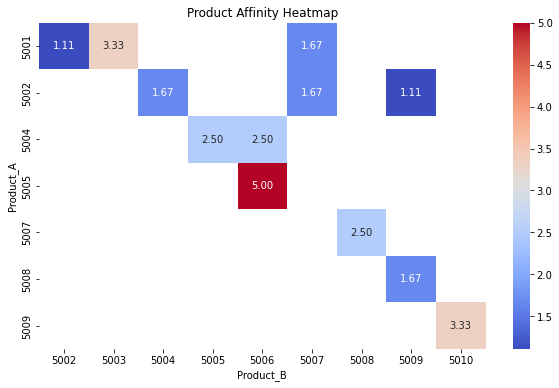

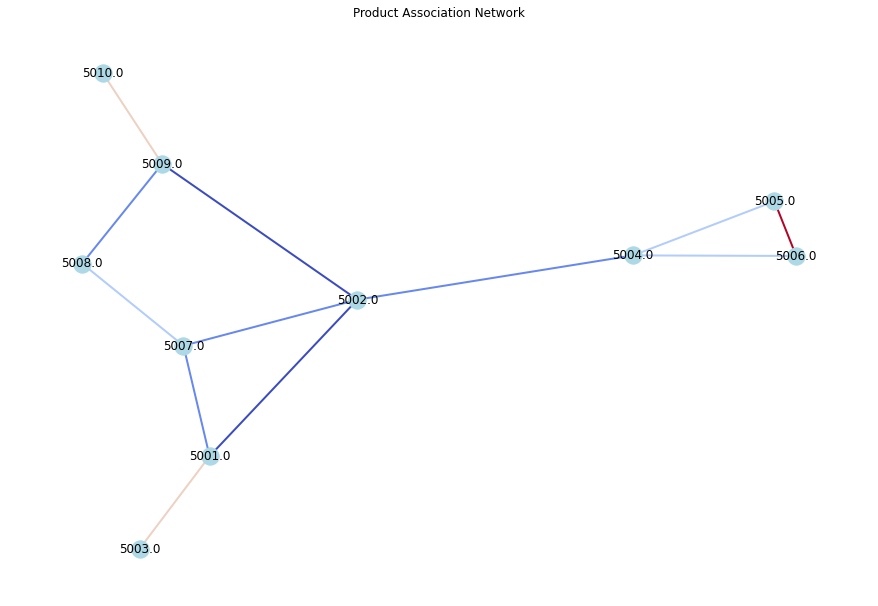

In [2]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import display

# Connect to MySQL Database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="durga",
    database="challenge"
)

# SQL Query for Association Rules
query = """
SELECT Product_A, Product_B, Lift FROM AssociationRules WHERE Lift > 1 ORDER BY Lift DESC;
"""

# Fetch Data
df = pd.read_sql(query, conn)
conn.close()

# Display Data
display(df)

# Plot Heatmap of Product Affinity
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot("Product_A", "Product_B", "Lift"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Product Affinity Heatmap")
plt.savefig("SQL_Product_Affinity_Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# Create Network Graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["Product_A"], row["Product_B"], weight=row["Lift"])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color=weights, edge_cmap=plt.cm.coolwarm, width=2)
plt.title("Product Association Network")
plt.savefig("SQL_Product_Association_Network.png", dpi=300, bbox_inches='tight')
plt.show()
